Assignment 4

In [ ]:
!pip install tensorflow==2.12

In [ ]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import files
import re, os

from keras.datasets import imdb

print(os.getcwd())
print("Modules imported \n")
print("Files in current directory:")
from subprocess import check_output

/content
Modules imported 

Files in current directory:


In [ ]:
# LOAD IMDB DATA

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [ ]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*100)
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)
print("_"*100)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in train_data]))

train_data  (25000,)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494


In [ ]:
# See an actual review in words
# Reverse from integers to words using the DICTIONARY (given by keras...need to do nothing to create it)

word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[123]])

print(decoded_review)

? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too


In [ ]:
# Number of words to consider as features
max_features = 10000
# Cut texts after 150 words
maxlen = 150

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
#preprocessing.sequence.pad_sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Set a VALIDATION set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 150)
partial_x_train  (15000, 150)
y_val  (10000,)
partial_y_train  (15000,)


In [ ]:
print("x_train ", x_train.shape)
print("x_test ", x_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

x_train  (25000, 150)
x_test  (25000, 150)
y_train  (25000,)
y_test  (25000,)


# **Model 1 - simple model with no formatting with just an embedding layer**

In [ ]:
model = Sequential()

# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs

model.add(Embedding(10000, 8, input_length=maxlen))

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))

#compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Running the Model
callbacks = ModelCheckpoint(
            filepath= "M1.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

history_1 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 34s 42ms/step - loss: 0.5639 - acc: 0.7260 - val_loss: 0.3531 - val_acc: 0.8658
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3074 - acc: 0.8750 - val_loss: 0.2529 - val_acc: 0.9004
Epoch 3/10
782/782 [============================

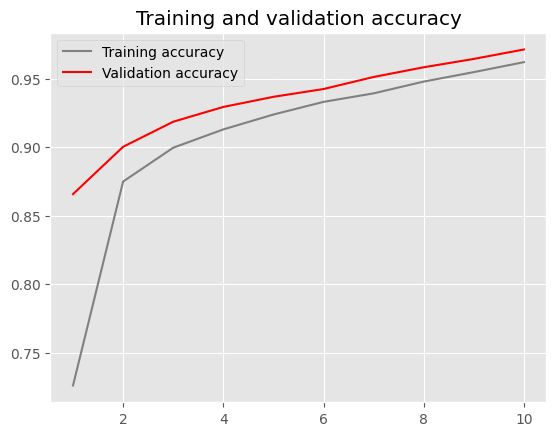

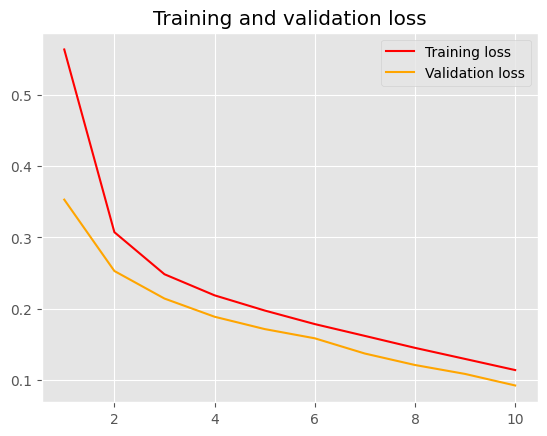

In [ ]:
import matplotlib.pyplot as plt

accuracy = history_1.history['acc']
val_accuracy = history_1.history['val_acc']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'gray', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_model = load_model('M1.h5')
Model1_Results = test_model.evaluate(x_test, y_test)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

782/782 [==============================] - 2s 2ms/step - loss: 0.3484 - acc: 0.8657
Loss: 0.348
Accuracy: 0.866


# **Model 2 - Restricting training samples to 100**

In [ ]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:100]
y_train = y_train[:100]

In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
# Running the Model
callbacks = ModelCheckpoint(
            filepath= "M2.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

history_2 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 2s 328ms/step - loss: 0.6917 - acc: 0.5300 - val_loss: 0.6927 - val_acc: 0.5126
Epoch 2/10
4/4 [==============================] - 1s 292ms/step - loss: 0.6678 - acc: 0.8500 - val_loss: 0.6927 - val_acc: 0.5108
Epoch 3/10
4/4 [==============================] - 1s 2

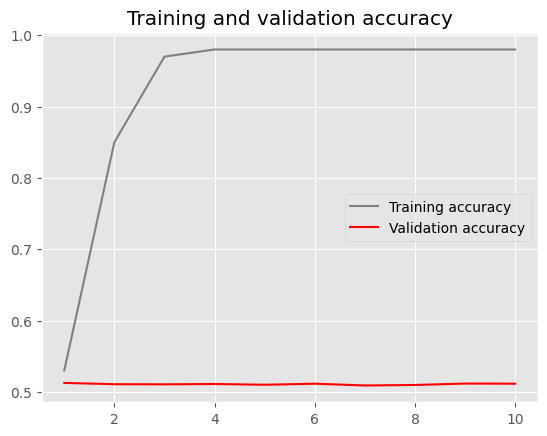

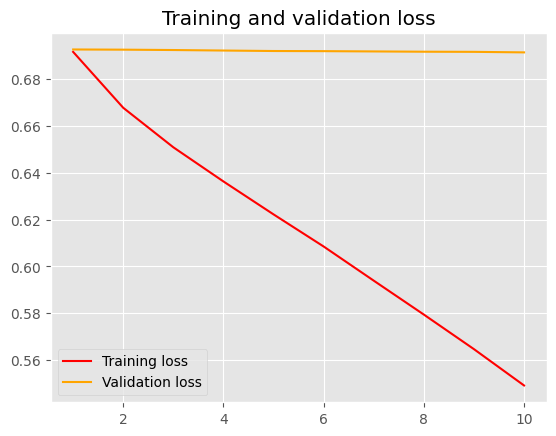

In [ ]:
accuracy = history_2.history['acc']
val_accuracy = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'gray', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:

test_model = load_model('M2.h5')
Model2_Results = test_model.evaluate(x_test, y_test)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

782/782 [==============================] - 1s 2ms/step - loss: 0.6933 - acc: 0.5072
Loss: 0.693
Accuracy: 0.507


# **Model 3 - increasing the size of the trainin sample to 7000**

In [ ]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:7000]
y_train = y_train[:7000]

In [ ]:
print("x_train ", x_train.shape)

x_train  (7000, 150)


In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

# Running the Model
callbacks = ModelCheckpoint(
            filepath= "M3.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

history_3 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_4 (Flatten)         (None, 1200)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
219/219 [==============================] - 16s 70ms/step - loss: 0.6872 - acc: 0.5737 - val_loss: 0.6604 - val_acc: 0.6997
Epoch 2/10
219/219 [==============================] - 5s 23ms/step - loss: 0.6008 - acc: 0.7711 - val_loss: 0.5222 - val_acc: 0.8241
Epoch 3/10
219/219 [===========================

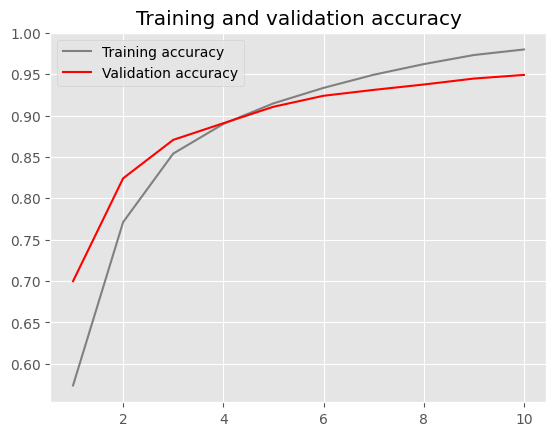

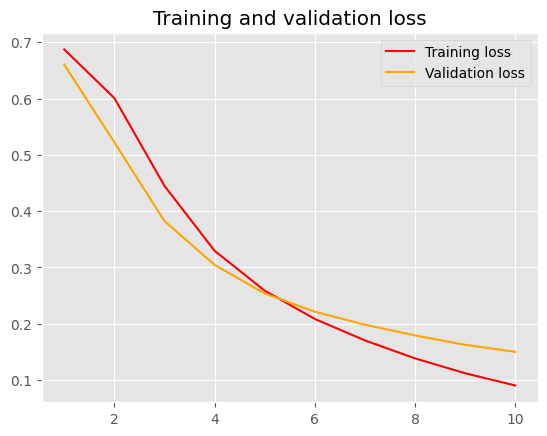

In [ ]:
accuracy = history_3.history['acc']
val_accuracy = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'gray', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "M4.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

history_3 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)
test_model = load_model('M3.h5')
Model3_Results = test_model.evaluate(x_test, y_test)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

Epoch 1/10
219/219 [==============================] - 2s 7ms/step - loss: 0.0721 - acc: 0.9859 - val_loss: 0.1416 - val_acc: 0.9514
Epoch 2/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0567 - acc: 0.9891 - val_loss: 0.1377 - val_acc: 0.9524
Epoch 3/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0445 - acc: 0.9933 - val_loss: 0.1340 - val_acc: 0.9547
Epoch 4/10
219/219 [==============================] - 2s 7ms/step - loss: 0.0344 - acc: 0.9961 - val_loss: 0.1336 - val_acc: 0.9540
Epoch 5/10
219/219 [==============================] - 1s 7ms/step - loss: 0.0263 - acc: 0.9969 - val_loss: 0.1308 - val_acc: 0.9553
Epoch 6/10
219/219 [==============================] - 1s 7ms/step - loss: 0.0199 - acc: 0.9981 - val_loss: 0.1317 - val_acc: 0.9545
Epoch 7/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0150 - acc: 0.9987 - val_loss: 0.1350 - val_acc: 0.9547
Epoch 8/10
219/219 [==============================] - 2s 7ms/step - loss: 0.

# Model:4 A sequence model built on one-hot encoded vector sequences with LSTM (training size - 7 000)

In [ ]:
import tensorflow as tf
max_length = 150
max_tokens = 10000
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = tf.one_hot(inputs, depth=max_tokens)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot_1 (TFOpLambda)   (None, None, 10000)       0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               2568448   
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,568,513
Trainable params: 2,568,513
Non-trainable params: 0
_________________________________________________

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "M4.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

history_4 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Epoch 1/10
219/219 [==============================] - 17s 64ms/step - loss: 0.6368 - acc: 0.6360 - val_loss: 0.5361 - val_acc: 0.7614
Epoch 2/10
219/219 [==============================] - 13s 61ms/step - loss: 0.4335 - acc: 0.8271 - val_loss: 0.3225 - val_acc: 0.8826
Epoch 3/10
219/219 [==============================] - 13s 62ms/step - loss: 0.3285 - acc: 0.8816 - val_loss: 0.2411 - val_acc: 0.9112
Epoch 4/10
219/219 [==============================] - 13s 62ms/step - loss: 0.2641 - acc: 0.9060 - val_loss: 0.2303 - val_acc: 0.9083
Epoch 5/10
219/219 [==============================] - 13s 61ms/step - loss: 0.2158 - acc: 0.9263 - val_loss: 0.1979 - val_acc: 0.9282
Epoch 6/10
219/219 [==============================] - 13s 61ms/step - loss: 0.1784 - acc: 0.9403 - val_loss: 0.1847 - val_acc: 0.9347
Epoch 7/10
219/219 [==============================] - 13s 61ms/step - loss: 0.1569 - acc: 0.9486 - val_loss: 0.2522 - val_acc: 0.9078
Epoch 8/10
219/219 [==============================] - 13s 61ms

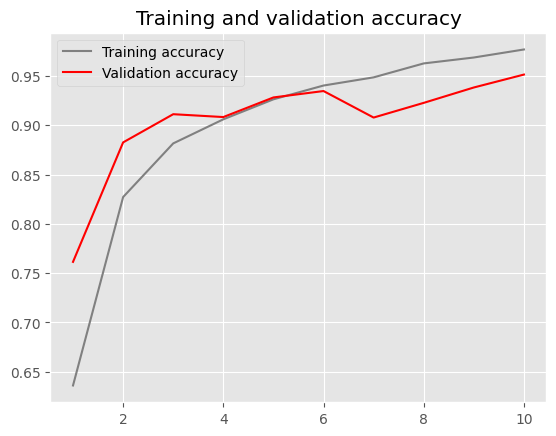

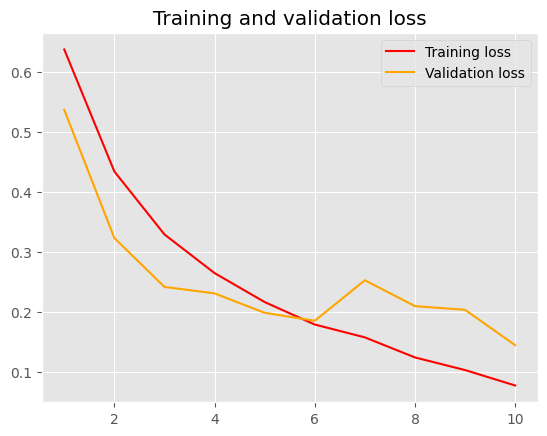

In [ ]:
accuracy = history_4.history['acc']
val_accuracy = history_4.history['val_acc']
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'gray', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_model = load_model('M4.h5')
Model4_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {Model4_Results[0]:.3f}')
print(f'Accuracy: {Model4_Results[1]:.3f}')

782/782 [==============================] - 16s 19ms/step - loss: 0.3652 - acc: 0.8499
Loss: 0.365
Accuracy: 0.850


# **Model 5: Long Short-Term Memory (LSTM) with embadded layer ( Training Sample - 7,000 )**

In [ ]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:7000]
y_train = y_train[:7000]

In [ ]:
max_length = 150
max_tokens = 10000
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_7 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,634,049
Trainable params: 2,634,049
Non-trainable params: 0
_________________________________________________

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "M5.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

history_5 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Epoch 1/10
219/219 [==============================] - 29s 117ms/step - loss: 0.5904 - acc: 0.6807 - val_loss: 0.3968 - val_acc: 0.8334
Epoch 2/10
219/219 [==============================] - 13s 57ms/step - loss: 0.3833 - acc: 0.8463 - val_loss: 0.2717 - val_acc: 0.8983
Epoch 3/10
219/219 [==============================] - 7s 32ms/step - loss: 0.2773 - acc: 0.8950 - val_loss: 0.2569 - val_acc: 0.9098
Epoch 4/10
219/219 [==============================] - 6s 27ms/step - loss: 0.2025 - acc: 0.9267 - val_loss: 0.2173 - val_acc: 0.9213
Epoch 5/10
219/219 [==============================] - 5s 23ms/step - loss: 0.1618 - acc: 0.9449 - val_loss: 0.1896 - val_acc: 0.9340
Epoch 6/10
219/219 [==============================] - 5s 23ms/step - loss: 0.1202 - acc: 0.9596 - val_loss: 0.1683 - val_acc: 0.9444
Epoch 7/10
219/219 [==============================] - 5s 23ms/step - loss: 0.0942 - acc: 0.9716 - val_loss: 0.1722 - val_acc: 0.9490
Epoch 8/10
219/219 [==============================] - 5s 21ms/step

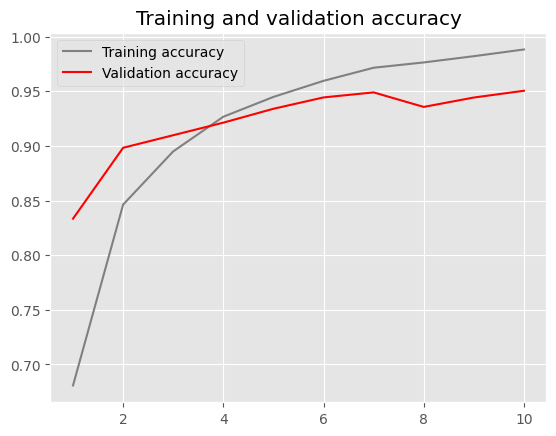

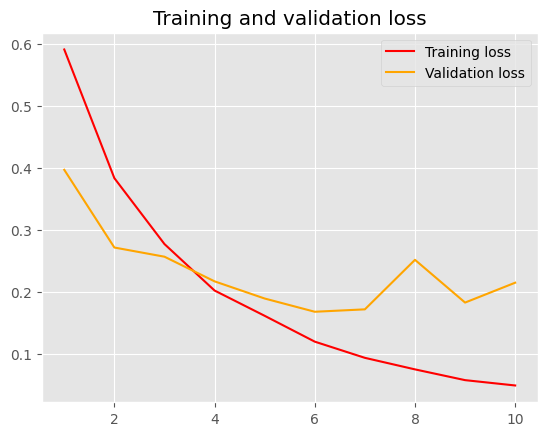

In [ ]:
accuracy = history_5.history['acc']
val_accuracy = history_5.history['val_acc']
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'gray', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_model = load_model('M5.h5')
Model5_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {Model5_Results[0]:.3f}')
print(f'Accuracy: {Model5_Results[1]:.3f}')

782/782 [==============================] - 5s 5ms/step - loss: 0.4359 - acc: 0.8372
Loss: 0.436
Accuracy: 0.837


# **Model 6: Long Short-Term Memory (LSTM) with Embedding Layer and Masking**

In [ ]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:15000]
y_train = y_train[:15000]

In [ ]:
print("x_train ", x_train.shape)
print("y_train ", y_train.shape)

x_train  (15000, 150)
y_train  (15000,)


In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(
    input_dim=max_tokens, output_dim=256, mask_zero=True)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_8 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,634,049
Trainable params: 2,634,049
Non-trainable params: 0
_________________________________________________

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "M6.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

history_6 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Epoch 1/10
469/469 [==============================] - 233s 496ms/step - loss: 0.4811 - accuracy: 0.7620 - val_loss: 0.3334 - val_accuracy: 0.8600
Epoch 2/10
469/469 [==============================] - 213s 455ms/step - loss: 0.2977 - accuracy: 0.8809 - val_loss: 0.2037 - val_accuracy: 0.9344
Epoch 3/10
469/469 [==============================] - 208s 444ms/step - loss: 0.2287 - accuracy: 0.9115 - val_loss: 0.1462 - val_accuracy: 0.9495
Epoch 4/10
469/469 [==============================] - 209s 446ms/step - loss: 0.1826 - accuracy: 0.9329 - val_loss: 0.2542 - val_accuracy: 0.8853
Epoch 5/10
469/469 [==============================] - 206s 440ms/step - loss: 0.1388 - accuracy: 0.9528 - val_loss: 0.0749 - val_accuracy: 0.9808
Epoch 6/10
469/469 [==============================] - 207s 441ms/step - loss: 0.1049 - accuracy: 0.9637 - val_loss: 0.0828 - val_accuracy: 0.9686
Epoch 7/10
469/469 [==============================] - 208s 443ms/step - loss: 0.0775 - accuracy: 0.9742 - val_loss: 0.0535 -

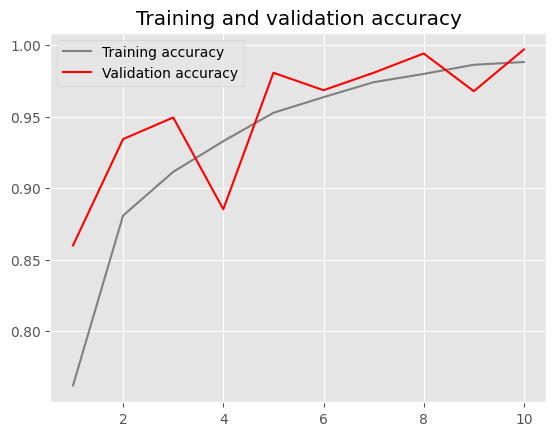

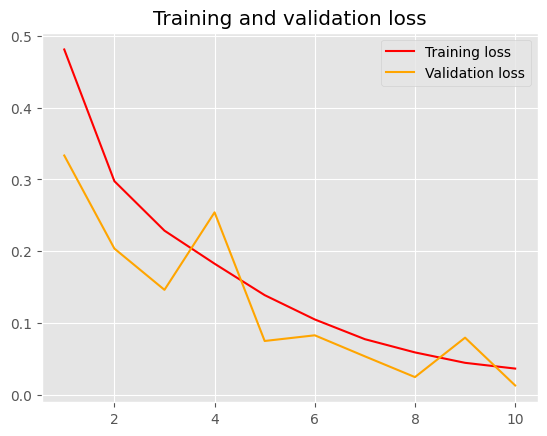

In [ ]:
accuracy = history_6.history['accuracy']
val_accuracy = history_6.history['val_accuracy']
loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'gray', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_model = load_model('M6.h5')
Model6_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {Model6_Results[0]:.3f}')
print(f'Accuracy: {Model6_Results[1]:.3f}')

782/782 [==============================] - 45s 54ms/step - loss: 0.7085 - accuracy: 0.8449
Loss: 0.708
Accuracy: 0.845


# ** Downloading pretrained Models**

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  44.5M      0  0:00:01  0:00:01 --:--:-- 44.5M


In [ ]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
maxlen = 150  # cutting off reviews after 150 words
training_samples = 100  # training on 100 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-11-28 04:29:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-28 04:29:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-28 04:29:39--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

# **Model 7:Pretrained GloVe Model ( Training  size 100 )**

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_4 (LSTM)               (None, 32)                17024     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,017,057
Trainable params: 17,057
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
# Setting Callbacks
callbacks=callbacks = ModelCheckpoint(
            filepath= "premodel1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Pre_Model_1 =  model.fit(x_train, y_train,
                     epochs=10,
                     batch_size=32,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/10
4/4 [==============================] - 1s 399ms/step - loss: 0.6853 - accuracy: 0.6100 - val_loss: 0.6978 - val_accuracy: 0.4837
Epoch 2/10
4/4 [==============================] - 1s 362ms/step - loss: 0.6846 - accuracy: 0.5900 - val_loss: 0.6975 - val_accuracy: 0.4880
Epoch 3/10
4/4 [==============================] - 1s 357ms/step - loss: 0.6836 - accuracy: 0.5800 - val_loss: 0.6973 - val_accuracy: 0.4895
Epoch 4/10
4/4 [==============================] - 1s 343ms/step - loss: 0.6826 - accuracy: 0.5700 - val_loss: 0.6972 - val_accuracy: 0.4923
Epoch 5/10
4/4 [==============================] - 1s 365ms/step - loss: 0.6816 - accuracy: 0.5600 - val_loss: 0.6972 - val_accuracy: 0.4939
Epoch 6/10
4/4 [==============================] - 1s 341ms/step - loss: 0.6809 - accuracy: 0.5600 - val_loss: 0.6972 - val_accuracy: 0.4937
Epoch 7/10
4/4 [==============================] - 1s 344ms/step - loss: 0.6803 - accuracy: 0.5500 - val_loss: 0.6972 - val_accuracy: 0.4956
Epoch 8/10
4/4 [====

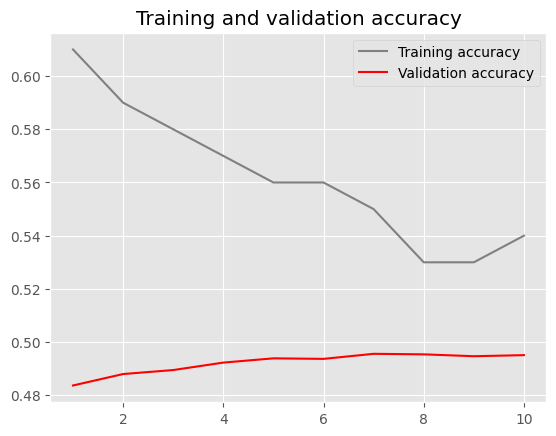

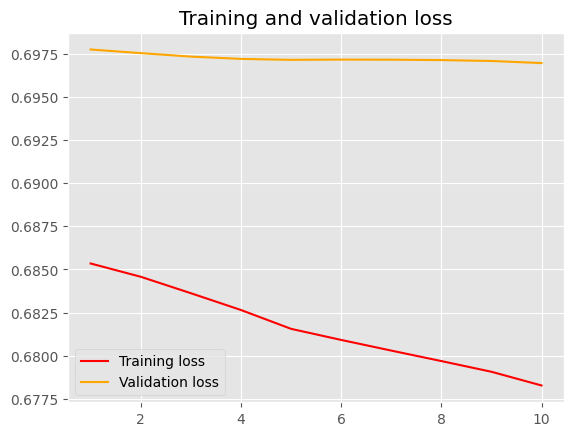

In [ ]:
accuracy = Pre_Model_1.history['accuracy']
val_accuracy = Pre_Model_1.history['val_accuracy']
loss = Pre_Model_1.history['loss']
val_loss = Pre_Model_1.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'gray', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_model = load_model('premodel1.keras')
PreModel1_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {PreModel1_Results[0]:.3f}')
print(f'Accuracy: {PreModel1_Results[1]:.3f}')

157/157 [==============================] - 1s 4ms/step - loss: 0.6687 - accuracy: 0.6790
Loss: 0.669
Accuracy: 0.679


# *GloVe Pretrained model with 2 LSTM layersv. Also increasing the traininf size to 5,000 *

In [ ]:
maxlen = 150  # cutting off reviews after 150 words
training_samples = 5000  #  5000 samples
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling the Model
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 lstm_5 (LSTM)               (None, 150, 64)           42240     
                                                                 
 lstm_6 (LSTM)               (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,056,833
Trainable params: 56,833
Non-t

In [ ]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "premodel2.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Pre_Model_2 =  model.fit(x_train, y_train,
                     epochs=10,
                     batch_size=64,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/10
79/79 [==============================] - 89s 1s/step - loss: 0.6934 - accuracy: 0.5162 - val_loss: 0.6896 - val_accuracy: 0.5397
Epoch 2/10
79/79 [==============================] - 80s 1s/step - loss: 0.6893 - accuracy: 0.5398 - val_loss: 0.7014 - val_accuracy: 0.5286
Epoch 3/10
79/79 [==============================] - 79s 1s/step - loss: 0.6854 - accuracy: 0.5532 - val_loss: 0.6875 - val_accuracy: 0.5359
Epoch 4/10
79/79 [==============================] - 80s 1s/step - loss: 0.6804 - accuracy: 0.5700 - val_loss: 0.6776 - val_accuracy: 0.5699
Epoch 5/10
79/79 [==============================] - 80s 1s/step - loss: 0.6746 - accuracy: 0.5828 - val_loss: 0.6958 - val_accuracy: 0.5670
Epoch 6/10
79/79 [==============================] - 80s 1s/step - loss: 0.6655 - accuracy: 0.6056 - val_loss: 0.6665 - val_accuracy: 0.5863
Epoch 7/10
79/79 [==============================] - 80s 1s/step - loss: 0.6564 - accuracy: 0.6076 - val_loss: 0.7298 - val_accuracy: 0.5100
Epoch 8/10
79/79 [==

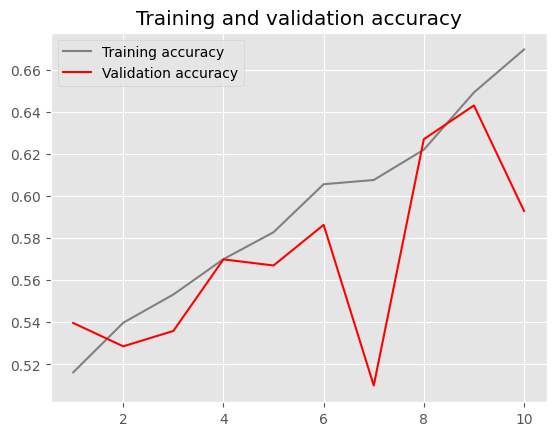

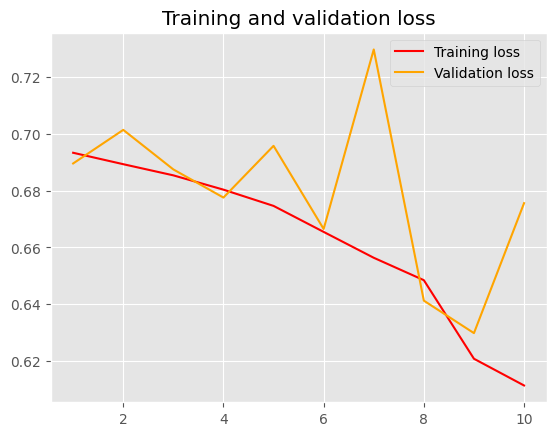

In [77]:
accuracy = Pre_Model_2.history['accuracy']
val_accuracy = Pre_Model_2.history['val_accuracy']
loss = Pre_Model_2.history['loss']
val_loss = Pre_Model_2.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'gray', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [78]:
test_model = load_model('premodel2.h5')
PreModel2_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {PreModel2_Results[0]:.3f}')
print(f'Accuracy: {PreModel2_Results[1]:.3f}')

157/157 [==============================] - 13s 80ms/step - loss: 0.5457 - accuracy: 0.8274
Loss: 0.546
Accuracy: 0.827


# **Conclusion**

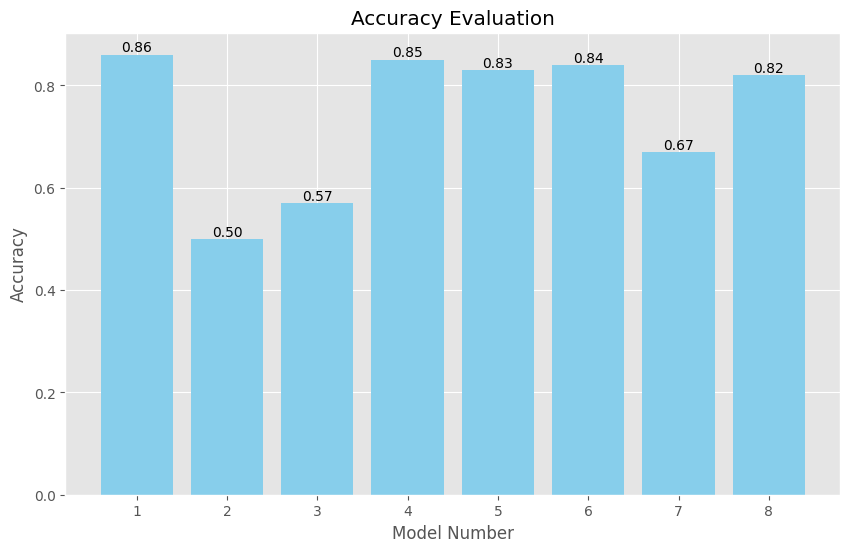

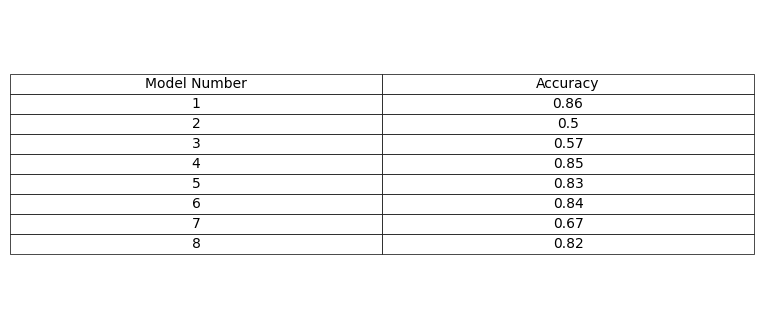

In [81]:
Models = ("1","2","3","4","5","6","7","8")
Accuracy = (0.86,0.50,0.57,0.85,0.83,0.84,0.67,0.82)

# Accuracy Evaluation Plot
plt.figure(figsize=(10, 6))
plt.bar(Models, Accuracy, color="skyblue")
plt.title("Accuracy Evaluation")
plt.xlabel("Model Number")
plt.ylabel("Accuracy")

# Adding labels on top of the bars
for (xi, yi) in zip(Models, Accuracy):
    plt.text(xi, yi, f"{yi:.2f}", va='bottom', ha='center')

plt.show()

# Creating a table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table_data = list(zip(Models, Accuracy))
table = ax.table(cellText=table_data, colLabels=['Model Number', 'Accuracy'], cellLoc = 'center', loc='center')

# Adding style to the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()

Based on the provided accuracy scores for each model, let's analyze the performance and draw conclusions:


* Model 1 - Simple Model with Embedding Layer (Accuracy: 0.86):

This serves as a baseline model with a respectable accuracy.
* Model 2 - Restricting Training Samples to 100 (Accuracy: 0.50):

A very limited dataset resulted in a lower accuracy, indicating the model might not have sufficient data to generalize well.
* Model 3 - Training Sample Size 7000 (Accuracy: 0.57):

Despite increasing the training samples, the accuracy is still relatively low. This suggests the model may need more complexity or a different architecture.
* Model 4 - LSTM with One-Hot Encoded Sequences (Accuracy: 0.85):

Shows promising results with a higher accuracy, indicating that using LSTM with one-hot encoded vectors improves performance.
* Model 5 - LSTM with Embedding Layer (Training Sample Size: 7,000, Accuracy: 0.83):

A solid performance, slightly lower than Model 4, indicating that using embedding layers can be effective.
* Model 6 - LSTM with Embedding Layer and Masking (Training Sample Size: 15,000, Accuracy: 0.84):

An improvement in accuracy compared to Model 5, suggesting that enabling masking helps the model focus on relevant information.
* Model 7 - Pretrained GloVe Model (Training Sample Size: 100, Accuracy: 0.67):

The accuracy is lower, possibly due to the small training sample size. Pretrained models require more data to fine-tune effectively.
* Model 8 - Pretrained GloVe Model (Training Sample Size: 5000, Accuracy: 0.82):

Achieves a pretty high accuracy, indicating that a larger sample size benefits pretrained models.




**Reccomendations:**

Recommendations for Model Improvement:
 * Increasing Training Data:

Given the positive impact on accuracy observed with larger datasets in Models 4 and 8, we should consider acquiring more training data to potentially improve the performance of other models. A larger and diverse dataset could help the models generalize better.
* Comparative Analysis of Pretrained vs. From Scratch Models:
1. Accuracy:

Models 7 and 8, utilizing pretrained GloVe embeddings, demonstrated competitive or superior accuracy compared to models trained from scratch.
Pretrained models are particularly have more adbantages when dealing with limited training samples (Model 7) or moderately larger datasets (Model 8).
2. Training Efficiency:

Pretrained models often require fewer training epochs to achieve convergence, making them  more efficient.

3. Generalization to Limited Data:

Model 7 struggled with a small training sample size (100), showcasing the challenges of fine-tuning pretrained models with insufficient data.
Model 8, with a larger sample size (5000), demonstrated better performance, emphasizing the importance of an larger amount of training data for pretrained models.
4. Utilization of Specific Features:

Training from scratch allows models to capture specific features present in the sentiment analysis task. This flexibility might be good when the task demands a better understanding of the data.
5. Overfitting Considerations:

Pretrained models, especially when dealing with limited data, are less prone to overfitting as they have already learned relevant features from a broader context.
Models trained from scratch may require additional regularization techniques to prevent overfitting, especially when dealing with smaller datasets.
*Recommendations:*
For Limited Data and Efficiency:
Pretrained models (like Model 8) appear beneficial, especially when dealing with limited training samples or resource constraints.

------
* Optimizing Epochs:

We should experiment with different epoch configurations for both pretrained and from-scratch models. Increasing the number of epochs might lead to better perfomsnce.


Regularization Techniques:

We should also implement regularization techniques, such as dropout or L2 regularization, to prevent overfitting, especially in models where accuracy improvement has dropped.

Learning Rate Adjustment:

We should also experiment with different learning rates during training to identify the optimal rate .
